
# Tutorial to Implement k-Nearest Neighbors in Python for classification
# 1. KNN Overview
K-nearest-neighbor (kNN) classification is one of the most fundamental classification technique and a primary choice of classification study when knowledge about the distribution of the data is very less. It was developed to perform discriminant analysis when reliable parametric estimates of probability densities are difficult to examine.

## 1a. Algorithm properties
kNN belongs to supervised learning family algorithms which can be used for both classification and regression predictive problems. 
Classification - For a unseen data instance, kNN will search k-most similar instances on the trained model and the predictive attribute of the most close/similar instances is summarized and returned as the prediction.
Regression - In case of regression, the mean of the predicted attributes may be returned.

Therefore for a labeled dataset of training observations (a,b), our goal is to learn a function h : A→B so that for an unseen observation a, h(a) can predict the corresponding output b.

## 1b. Euclidean distance measure
In k-nearest neighbor algorithm, we have to find the majority of instances amongst k-closest neighbors using distance metric between the instances to the unseen instance. A simple way to do this is Euclidean distance. Let there be n input samples (i=1,2,…,n) and p features (j=1,2,…,p) . Others distance metrics like can be used are Manhattan, Chebyshev and Hamming distance measure can also be used.For xi input sample, the Euclidean distance between sample xi and xl (l=1,2,…,n) is defined as

![equation](equation.png)


This distance metric help us find nearest neighbors to test value and finding the majority in those neighbors will help us predict the output.

## 1c. Normalizing features
Normalizing attributes is used to rescale components of a feature vector. In kNN we measure the distances between pairs of samples and these distances are influenced by the measurement units also. For example: Suppose if we are applying kNN on a data set with 2 features. First feature ranging from 1-10 and other from 100-1000 then most of the clusters will be generated based on the 2nd feature. To avoid this miss classification, we should normalize the feature variables.

## 1d. Steps for kNN Algorithm
Step 1) Load the dataset and split into test/train datasets.<br>
Step 2) Choose the value for k in kNN<br>
Step 3) Calculate the distance between new data instance and your trained  data sets to locate k most similar data instances.<br>
Step 4) Count the number of points of each category and generate response.<br>
Step 5) Summarize the accuracy of predictions <br>



# 2. Data preparation

## 2a. Importing Libraries

In [1]:
import numpy as np
import pandas as pd

## 2b. Loading Iris dataset

Iris dataset has features like petal_length, petal_width, sepal_length, sepal_width which determines the type of iris plant.
Since iris dataset is so popular it is also included in sklearn




In [2]:
# Loading iris data from csv file
iris_data = pd.read_csv('iris.csv')

In [3]:
#can import iris dataset from sklearn module also
from sklearn.datasets import load_iris
# iris_data = load_iris()
# print(iris_data.data)
# print(iris_data.feature_names)
# print(iris_data.target_names)


## 2c. Data overview

In [4]:
# View of the head rows present in the data
print(iris_data.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [5]:
# Displays shape of data
print(iris_data.shape)

(150, 5)


In [6]:
# Describing the data present in the iris dataset
print(iris_data.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [7]:
# Looking at the data according to the target values present in data
print(iris_data.groupby('species').size())

species
setosa        50
versicolor    50
virginica     50
dtype: int64


## 2d. Generating features and labels for dataset
From above dataset analysis we can see that the features present in our dataset are sepal_length, sepal_width, petal_length and petal_width which eventually have target value in species.<br>

Since our target label is string like 'setosa', 'virginica' etc we have encode it to transform them into numbers



In [8]:
# X is feature fector whereas y has target values
from sklearn.preprocessing import LabelEncoder
X = iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = iris_data['species'].values
labelenc = LabelEncoder()
y = labelenc.fit_transform(y)

# 3 Data Visualization

Let us visualize our dataset to gain more insights about data using different plots.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 3a. Scatter plot of distribution

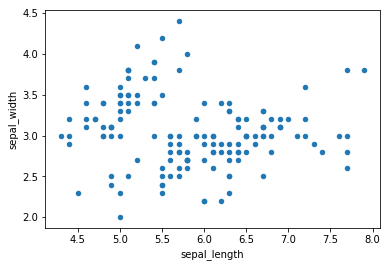

In [10]:
# First we are plotting sepal_length vs sepal_width for our data using .plot extension
iris_data.plot(kind="scatter", x="sepal_length", y="sepal_width")

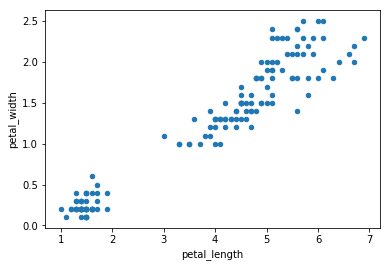

In [11]:
# Plotting petal_length vs petal_width for our data using .plot extension
iris_data.plot(kind="scatter", x="petal_length", y="petal_width")

## 3b. Plotting labeled data using seaborn

We can use seaborn library to make similar plots.<br>
We will use seaborn's FacetGrid to color the scatterplot by species.

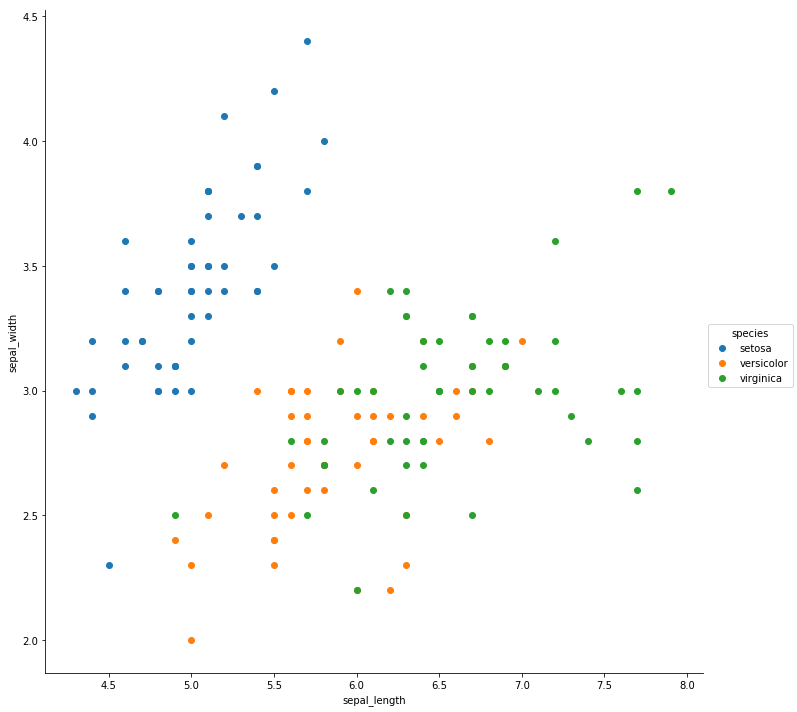

In [12]:
sns.FacetGrid(iris_data, hue="species", size=10) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()

## Pairplot
Another useful seaborn plot is the pairplot, which shows bivariate relation between each pair of features

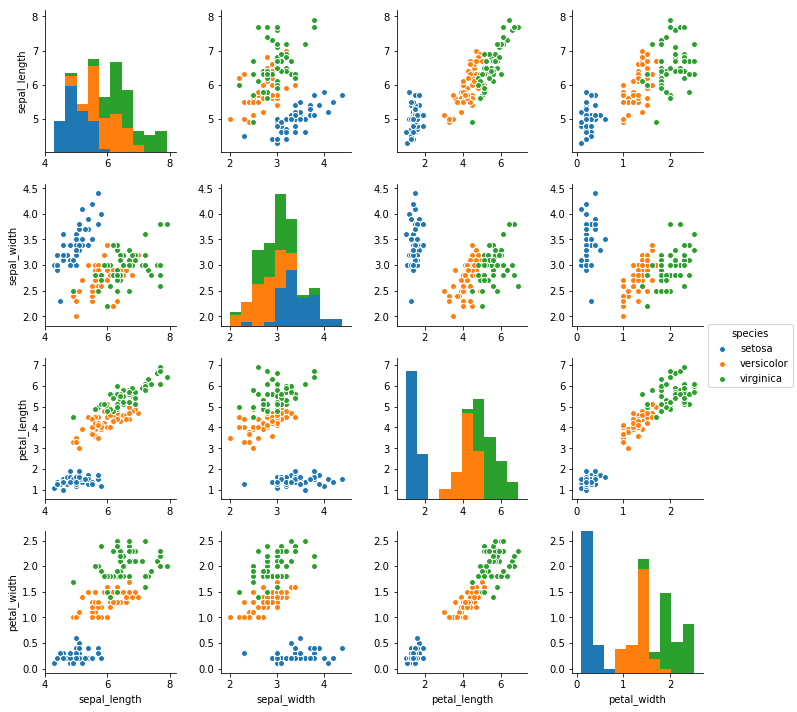

In [13]:
# By using pairplot we can visualize that in Iris-data Setiosa species 
# is separated from other two across all feature combinations
sns.pairplot(iris_data, hue = "species")

# 3c. Multivariate 

## Andrew Curves

Andrew curves helps visualize multidimensional data by mapping each observation onto a function. <br>
Andrew curves use attributes of data samples as coefficients for Fourier series and then plotting it


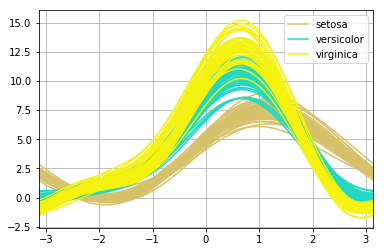

In [14]:
from pandas.plotting import andrews_curves 
andrews_curves(iris_data,"species")

In [15]:
# In the above plot we can clearly see that each class i.e. samples haivng 
# same target values denoted by same color have same curve

## Parallel plot 
Parallel cordinates is also a multivariate plotting technique in pandas <br>
It helps estimating of statistics visually by showing clusters. <br>
It uses a separate column to draw each feature & then draws lines connecting the features for each data sample

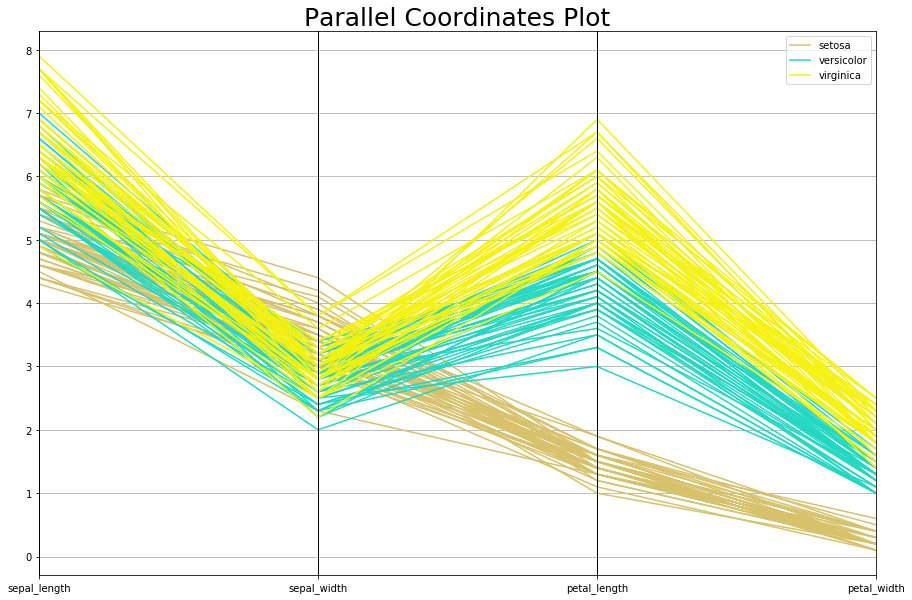

In [16]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(iris_data, "species")
plt.title('Parallel Coordinates Plot', fontsize=25)
plt.show()

# 3d. 3D Data Visualization

We can also visualize using 3d plot using different properties of objects.


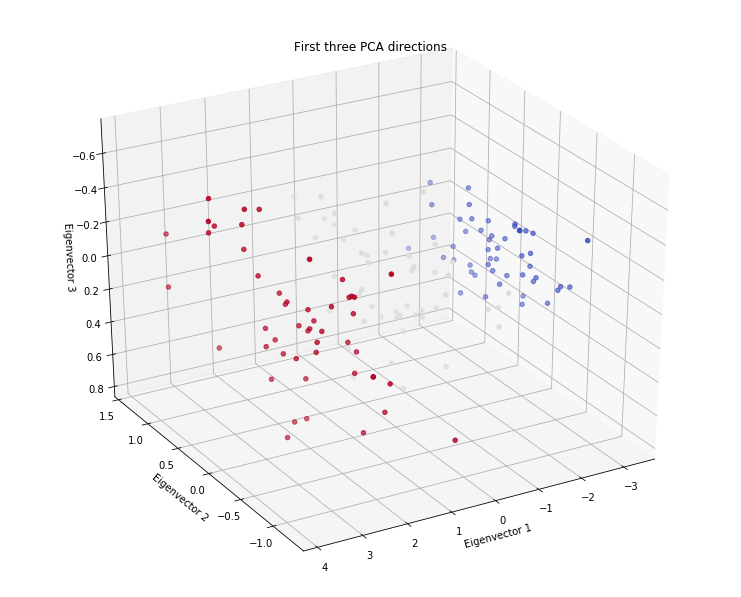

In [17]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(10, 8))
ax = Axes3D(fig, elev=-150, azim=120)

X_red = PCA(3).fit_transform(X)

ax.scatter(X_red[:, 0], X_red[:, 1], X_red[:, 2], c=y,
           cmap=plt.cm.coolwarm)

ax.set_title("First three PCA directions")
ax.set_xlabel("Eigenvector 1")

ax.set_ylabel("Eigenvector 2")

ax.set_zlabel("Eigenvector 3")

plt.show()

# 4. Classifying data using kNN



## 4a. Making preditions

Here we are checking accuracy for different k values and then comparing them. Also we have added logistic regression model to predict and check accuracy just to have fair assessment. Here ew have take 3 knn classifiers for k =1,3,5.

In [18]:
# Loading library and instantiating classifier with different k values
from sklearn.neighbors import KNeighborsClassifier
knn_clf1 = KNeighborsClassifier(n_neighbors = 1)
knn_clf2 = KNeighborsClassifier(n_neighbors = 3)
knn_clf3 = KNeighborsClassifier(n_neighbors = 5)

In [19]:
# Fitting classifier to our training sets
knn_clf1.fit(X,y)
knn_clf2.fit(X,y)
knn_clf3.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [20]:
# Prediting output for different k values with test value

predited_vals = []
predited_vals.append(knn_clf1.predict([[3,5,4,2]]))
predited_vals.append(knn_clf2.predict([[3,5,4,2]]))
predited_vals.append(knn_clf3.predict([[3,5,4,2]]))
k = 1
for val in predited_vals:
    if(val == 1):
        print("Predition for a test value with k =", k , ": setosa")
    if(val == 2):
        print("Predition for a test value with k =", k , ": versicolor")
    if(val == 3):
        print("Predition for a test value with k =", k , ": virginica")    
    k += 2

Predition for a test value with k = 1 : versicolor
Predition for a test value with k = 3 : setosa
Predition for a test value with k = 5 : setosa


In [21]:
out_array = knn_clf1.predict([[3,5,4,2],[5,4,3,2]])
flower_type = []
for value in out_array:
    if(value == 0):
        flower_type.append("setosa")
    if(value == 1):
        flower_type.append("versicolor")
    if(value == 2):
        flower_type.append("virginica")
print("For the above input and k =1 prediciton is:", flower_type)

For the above input and k =1 prediciton is: ['virginica', 'versicolor']


In [22]:
out_array = knn_clf2.predict([[3,5,4,2],[5,4,3,2]])
flower_type = []
for value in out_array:
    if(value == 0):
        flower_type.append("setosa")
    if(value == 1):
        flower_type.append("versicolor")
    if(value == 2):
        flower_type.append("virginica")
print("For the above input and k =3 prediciton is:", flower_type)

For the above input and k =3 prediciton is: ['versicolor', 'versicolor']


In [23]:
out_array = knn_clf3.predict([[3,5,4,2],[5,4,3,2]])
flower_type = []
for value in out_array:
    if(value == 0):
        flower_type.append("setosa")
    if(value == 1):
        flower_type.append("versicolor")
    if(value == 2):
        flower_type.append("virginica")
print("For the above input and k =5 prediciton is:", flower_type)

For the above input and k =5 prediciton is: ['versicolor', 'versicolor']


## 4b. Using Logistic Regression to classify and comparing with previous model

In [24]:
from sklearn.linear_model import LogisticRegression

# instantite the logistic regression model with default parameters
logistic_reg = LogisticRegression()

# fitting the model with our data
logistic_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
out_array = logistic_reg.predict([[3,5,4,2],[5,4,3,2]])
flower_type = []
for value in out_array:
    if(value == 0):
        flower_type.append("setosa")
    if(value == 1):
        flower_type.append("versicolor")
    if(value == 2):
        flower_type.append("virginica")
print("For the above input and logistic regression prediciton is:", flower_type)

For the above input and logistic regression prediciton is: ['virginica', 'setosa']


We can see the difference in the outputs. So which is the correct one? We cannot tell because the goal of supervised learning is to generalize and we often cannot truely tell which is the correct output. We can just predict based on the datasets and models.

Let us answer some questions:
How do we choose which model to use for our supervised learning task?<br>
How do we choose the best tuning parameters for that model?<br>
And how to estimate the likely performance of our model on out-of-sample data?



# 4c. Evaluating the models

## Procedure 1


1) Train the model on the entire dataset and test the model on the same dataset.

2) Evaluate how well we did by comparing predicted response with the true response.

In [26]:
y_pred_logistic_reg = logistic_reg.predict(X)
y_pred_knn1 = knn_clf1.predict(X)
y_pred_knn2 = knn_clf2.predict(X)
y_pred_knn3 = knn_clf3.predict(X)

Evaluating the prediction
using evaluation metric for classification

In [27]:
from sklearn import metrics

In [28]:
print("Accuracy for kNN with k = 1 value :", metrics.accuracy_score(y,y_pred_knn1))
print("Accuracy for kNN with k = 3 value :", metrics.accuracy_score(y,y_pred_knn2))
print("Accuracy for kNN with k = 5 value :", metrics.accuracy_score(y,y_pred_knn3))
print("Accuracy for logistic regression :", metrics.accuracy_score(y,y_pred_logistic_reg))

Accuracy for kNN with k = 1 value : 1.0
Accuracy for kNN with k = 3 value : 0.96
Accuracy for kNN with k = 5 value : 0.966666666667
Accuracy for logistic regression : 0.96


In this case, k=1 seems the best model to predict the data. But evaluating the model on the above paramter is not a good idea since k=1 we are overfitting the training data that won't necessarily generalize.
In this case of knn, very low value of k creates a high complexity model as it follows the noise.

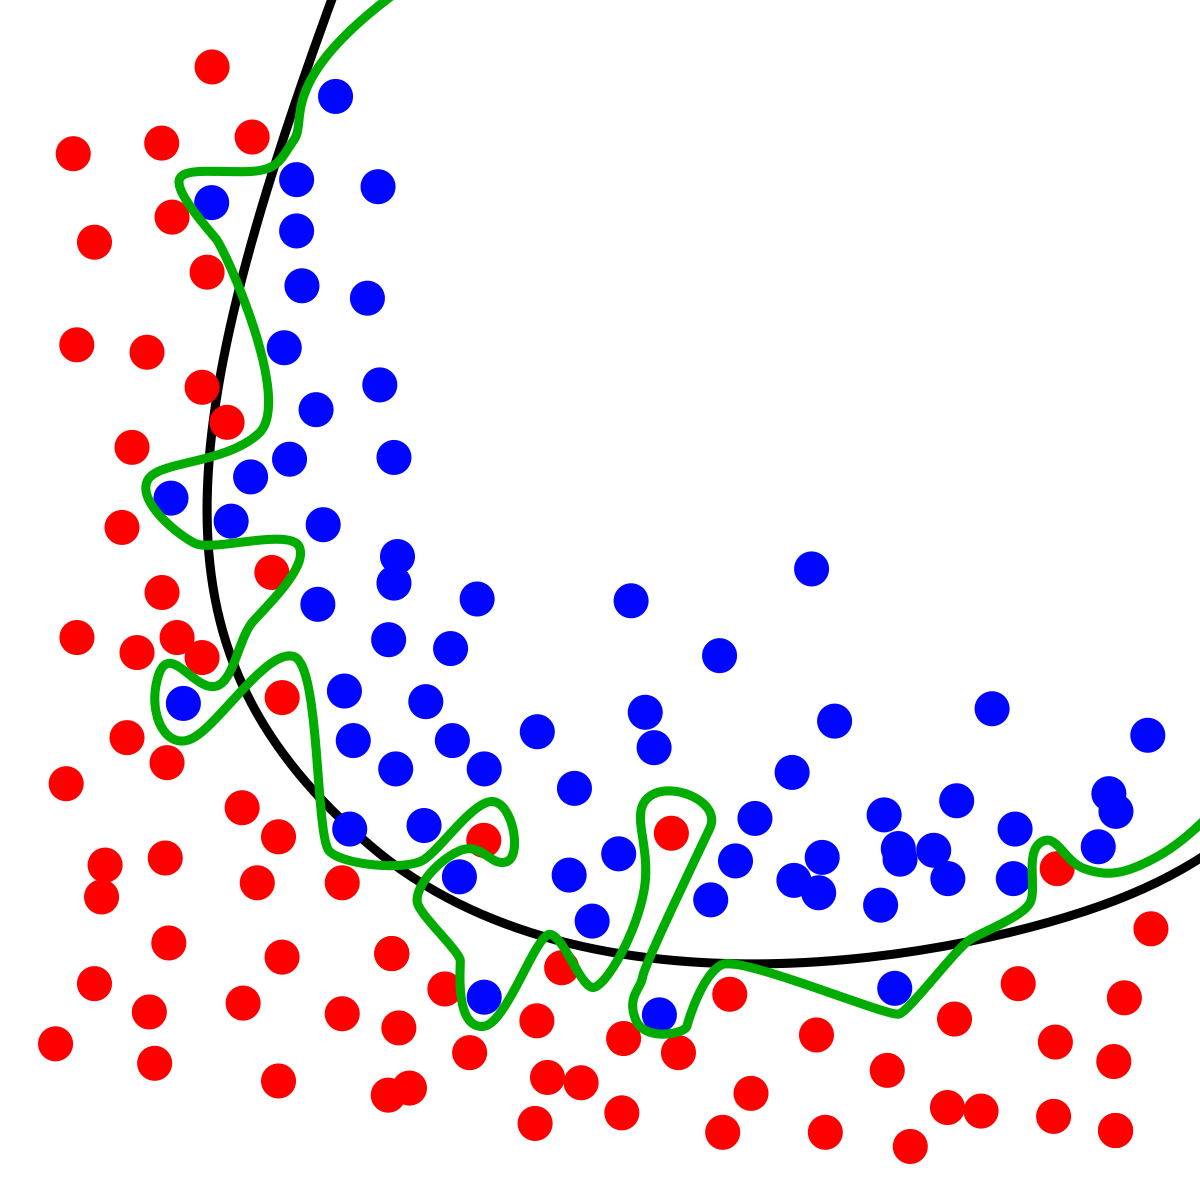

Since evaluating on training and testing on the same set of data is not a good approach, we will use other approach.


## Procedure 2 : Train/Test split

1) Split the dataset into 2: training set and a testing set.<br>
2) Train on training set and test on the testing set to evaluate.<br>

Generally data is split from range of train:test (60:40) to (80:30). Here we split data for train:test ratio = (70:30)


In [29]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

/Users/amandubey/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
print(X_train.shape , X_test.shape, y_train.shape, y_test.shape)

(105, 4) (45, 4) (105,) (45,)


In [31]:
# Prediting on the new train and test values
logistic_reg.fit(X_train,y_train)
knn_clf1.fit(X_train,y_train)
knn_clf2.fit(X_train,y_train)
knn_clf3.fit(X_train,y_train)

y_pred_log_regression = logistic_reg.predict(X_test)
y_pred_knn_clf1 = knn_clf1.predict(X_test)
y_pred_knn_clf2 = knn_clf2.predict(X_test)
y_pred_knn_clf3 = knn_clf3.predict(X_test)
print("Accuracy for kNN with k = 1 value :" , metrics.accuracy_score(y_test, y_pred_knn_clf1))
print("Accuracy for kNN with k = 3 value :", metrics.accuracy_score(y_test, y_pred_knn_clf2))
print("Accuracy for kNN with k = 5 value :", metrics.accuracy_score(y_test, y_pred_knn_clf3))
print("Accuracy for logistic regression model :", metrics.accuracy_score(y_test, y_pred_log_regression))

Accuracy for kNN with k = 1 value : 0.955555555556
Accuracy for kNN with k = 3 value : 0.977777777778
Accuracy for kNN with k = 5 value : 0.977777777778
Accuracy for logistic regression model : 0.933333333333


Here we can better analyse the accuracy scores for different models as we divided the data in train and test sets and eventually we were able to get more appropiate predicted values on the trained sets.

# 4d. Hyper tuning parameter using cross-validation

For using kNN it is very important to determine the value of k so that our model predicts better. This is also called hyper tuning parameter as we want to value of k to get more accurate model

In [32]:
# Using cross-validation 5 we are trying to determine best value of k for classification 
from sklearn.model_selection import cross_val_score
k_values = list()
cv_scores = []

for k in range(1,20):
    k_values.append(k)
    knn = KNeighborsClassifier(k)
    scores = cross_val_score(knn, X, y, scoring='accuracy', cv = 5)
    print(k , scores.mean())
    cv_scores.append(scores.mean())

1 0.96
2 0.946666666667
3 0.966666666667
4 0.973333333333
5 0.973333333333
6 0.98
7 0.98
8 0.966666666667
9 0.973333333333
10 0.98
11 0.98
12 0.98
13 0.973333333333
14 0.966666666667
15 0.966666666667
16 0.966666666667
17 0.966666666667
18 0.966666666667
19 0.966666666667


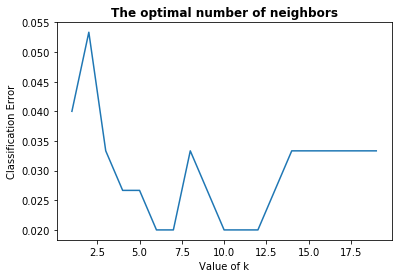

In [33]:
# Plotting classification error
Classification_error = list()
for x in cv_scores:
    Classification_error.append(1-x)
plt.figure()
plt.title('The optimal number of neighbors', fontweight='bold')
plt.xlabel('Value of k')
plt.ylabel('Classification Error')
plt.plot(k_values, Classification_error)

plt.show()

In [34]:
# Returning optimal value of k
best_k_val = k_values[Classification_error.index(min(Classification_error))]
print("Optimal value of k is",str(best_k_val))

Optimal value of k is 6


# 5. Our implementation of kNN

In [35]:
import numpy as np
import scipy as sp
import pandas as pd


class kNNClassifier():
    
    def __init__(self, n_neighbors):
        self.n_neighbors=n_neighbors
        self.X = 0
        self.y = 0
        
    def predict(self, X_test):
        
        r, c = X_test.shape
        knn_predictions = np.zeros(r)
        
        # loop over all observations
        for i in range(r):

            x_train = X_test[i, :]
            # distance calculation for all the values in test set
            distances = [(x_train - X[j]).dot(x_train - X[j]) for j in range(X.shape[0])]

            # combining arrays as columns
            distances = sp.c_[distances, y]
            # sorting array by value of first column so that k smallest distances can be picked
            distances_sorted = distances[distances[:,0].argsort()]
            # picking k smallest neighbors
            targets = distances_sorted[0:k,]

            unique, counts = np.unique(targets, return_counts=True)
            knn_predictions[i] = unique[np.argmax(counts)]                                 

        return(knn_predictions)
        
    def fit(self, X, y):
        n_samples = X.shape[0]
        
        if y.shape[0] != X.shape[0]:
            print("X and y needs to have sample numbers")
        
        else:
            self.X = X
            self.y = y

# Using our model to train and test with k =3. Also we check the accuracy of our model
my_kNN = kNNClassifier(n_neighbors=3)
my_kNN.fit(X_train, y_train)

y_pred = my_kNN.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is :' , accuracy)

Accuracy of our model is : 97.7777777778


# 6. Limitations
As we have studied KNN here are few limitations of using KNN algorithm for classification

1) While using KNN each attribute must be scaled properly. It doesn't handle catogorical variable very well. The algorithm's results completety depends on how you scale these numbers, and there is almost no reasobale way to visualize it if you have more than 4 attributes.

2) KNN doesn't handle 'soft' boundaries - i.e. areas where some cases appear on either side of a boundary.

3) If you include attributes which are string, you might like to solve this by using 0's and 1's, but again in k-NN this is another scaling problem.

4) If there are bunch of attributes that are highly correlated to each other, then including them all us tantamount to multiplying the scale of that factor.

# 7. Summary

In this tutorial we learnt about kNN and how it does classification and some metaphors that you can use to think about the algorithm. We implemented the algorithm from scratch so that we can have more understanding of the working of algorithm. We took example of Iris data which helped us visualize the data and using kNN we were successfully able to classify it. <br>
Our key learnings from this tutorial are:<br>
k-Nearest Neighbor: kNN is a simple but powerful non-parametric method algorithm.<br>
Lazy-learning Algorithm: A model is only constructed when there is need to make a prediction.<br>
Competitive-learning: predictive decisions and Learnings are made by internal comparisions and competetion of model elements.<br>
Similarity Measure: Key feature of the algorithm is to Calculate objective distance measures between data instances.

# 8. References

1. Wikipedia Overfitting : https://en.wikipedia.org/wiki/Overfitting
2. Theory : http://www.scholarpedia.org/article/K-nearest_neighbor
3. Iris dataset : https://gist.github.com/curran/a08a1080b88344b0c8a7
4. Supervised Learnings : http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html
5. https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/
6. Image : https://commons.wikimedia.org/w/index.php?curid=3610704